In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [ ]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [ ]:
x=df.drop(['Store_Sales'],axis=1)
y=df['Store_Sales']

In [ ]:
x

,Store ID,Store_Area,Items_Available,Daily_Customer_Count
0,1,1659,1961,530
1,2,1461,1752,210
2,3,1340,1609,720
3,4,1451,1748,620
4,5,1770,2111,450
...,...,...,...,...
891,892,1582,1910,1080
892,893,1387,1663,850
893,894,1200,1436,1060
894,895,1299,1560,770


In [ ]:
y

0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

In [ ]:
y_pred

array([57156.54808765, 56398.87933419, 56054.72676947, 56953.4569062 ,
       58444.89508627, 56884.57597572, 58000.22383515, 55542.95669672,
       54655.46509812, 54168.66227556, 55765.9811158 , 58897.29353041,
       58244.31734199, 58195.53667264, 56826.23387985, 57578.28520198,
       58852.07807959, 58690.87809889, 57247.06942071, 61005.9482906 ,
       56218.39873363, 56817.44203662, 59099.50484742, 57247.88730608,
       55714.70075899, 58847.78152561, 57664.277574  , 56081.87593618,
       57410.7924689 , 59196.29796904, 57728.02494849, 56020.49647446,
       56599.02459582, 59981.57838824, 56629.23883792, 59467.97100865,
       57267.83261341, 55398.21837635, 59926.54763466, 54832.91878538,
       57449.87645309, 53243.52054234, 58649.88622764, 58804.96607172,
       53152.60625184, 55517.5909865 , 58118.02153751, 58373.75881845,
       57977.28528631, 56970.83549272, 57775.35487272, 58444.22906748,
       54002.60822925, 59958.51723253, 58606.65579622, 56876.17877304,
      

In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_actual = y
y_predicted = y_pred

MSE = mean_squared_error(y_actual, y_predicted)

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

17039.87499156996


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_root_mean_squared_error')

print("Cross-validation scores:", -1*scores)
print("Mean score:", -1*scores.mean())

Cross-validation scores: [16482.53139109 18183.52021982 16374.92190775 17217.68789871
 17367.26028204]
Mean score: 17125.184339881976


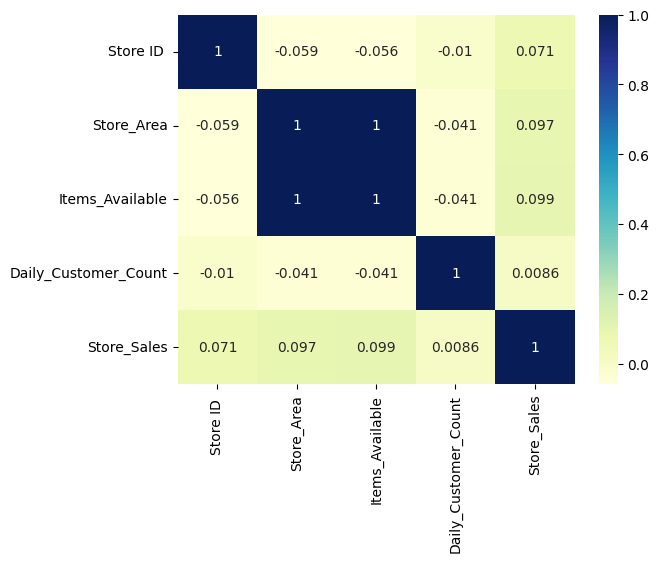

In [ ]:

# importing the modules
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

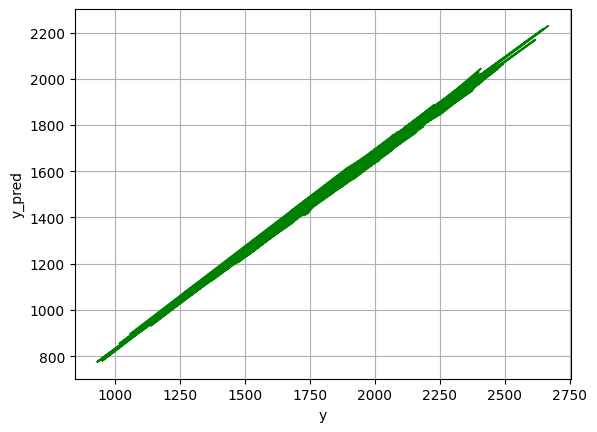

In [ ]:
import matplotlib.pyplot as plt
x=df['Items_Available']
y=df['Store_Area']
plt.plot(x, y, color='green')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
model1=Ridge()
model1.fit(x,y)
y_pred1=model1.predict(x)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(model1, x, y, cv=kf, scoring='neg_root_mean_squared_error')

print("Cross-validation scores:", -1*scores)
print("Mean score:", -1*scores.mean())

Cross-validation scores: [16482.53161457 18183.52001204 16374.92207896 17217.68756513
 17367.25888336]
Mean score: 17125.18403081277


In [ ]:
from sklearn.linear_model import Lasso
model2=Lasso()
model2.fit(x,y)
y_pred2=model2.predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+11, tolerance: 2.645e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
scores = cross_val_score(model2, x, y, cv=kf, scoring='neg_root_mean_squared_error')

print("Cross-validation scores:", -1*scores)
print("Mean score:", -1*scores.mean())

Cross-validation scores: [16484.54757316 18182.11146817 16376.34032749 17215.36336118
 17358.11108035]
Mean score: 17123.294762068726


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.051e+11, tolerance: 2.154e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+11, tolerance: 2.044e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.051e+11, tolerance: 2.153e

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha':[x for x in range(0,10000)]
}
grid_search = GridSearchCV(model1, parameters, n_jobs=-1)
grid_search.fit(x, y)

best_model = grid_search.best_estimator_

In [ ]:
best_model

Ridge(alpha=999)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha':[x for x in range(0,100)]
}
grid_search = GridSearchCV(model2, parameters, n_jobs=-1)
grid_search.fit(x, y)

best_model1 = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.419e+10, tolerance: 2.645e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
best_model1

Lasso(alpha=99)